In [1]:
import pandas as pd
import numpy as np
import maddpkg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# Load train and test sets

X_train = pd.read_csv("./data/X_train_stClick_7030.csv")
X_test = pd.read_csv("./data/X_test_stClick_7030.csv")
y_train = pd.read_csv("./data/y_train_stClick_7030.csv").values.ravel()
y_test = pd.read_csv("./data/y_test_stClick_7030.csv").values.ravel()

In [3]:
# Learn a classifier

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [4]:
NB_FOLD = 5
scores_train = cross_val_score(model, X_train, y_train, cv=NB_FOLD)
print("Accuracy on the train set with cross-validation: \n - %0.2f with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))
print(f"Accuracy on the test set: \n - {round(accuracy_score(y_test, model.predict(X_test)), 2)}")

Accuracy on the train set with cross-validation: 
 - 0.72 with a standard deviation of 0.01
Accuracy on the test set: 
 - 0.72


In [5]:
# Predicted probabilities of positive predictions

y_pp = model.predict_proba(X_test)[:, 1] 

## MADD(e)

In [6]:
e = np.linspace(start=0.0001, stop=1, num=10000, endpoint=False)
# too much time for num=1000000

In [7]:
madd = [maddpkg.MADD(X_test, y_pp, "gender", ei) for ei in e]

In [8]:
madd_min_ind = np.argmin(madd)
print("MADD minimum:", madd[madd_min_ind])
print("e associated:", e[madd_min_ind])

MADD minimum: 0.07821229
e associated: 0.31566844


Text(0.5, 1.0, 'MADD(e) with real-data (OULAD course BBB, logistic classifier, gender)')

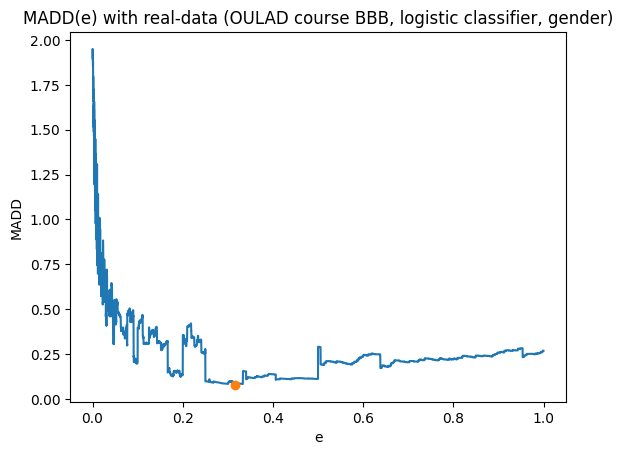

In [9]:
plt.plot(e, madd)
plt.plot(e[madd_min_ind], madd[madd_min_ind], "o", label="MADD minimum")
plt.xlabel("e")
plt.ylabel("MADD")
plt.title("MADD(e) with real-data (OULAD course BBB, logistic classifier, gender)")

## MADD(e) focus on [0, 1]*optimal order

In [10]:
n0 = len(X_test[X_test["gender"] == 0])
n1 = len(X_test[X_test["gender"] == 1])
order = ( (n0**(1/2) + n1**(1/2)) / (n0*n1)**(1/2) )**(2/3)
print(n0)
print(n1)
print(order)

1404
186
0.21546010543476263


Text(0.5, 1.0, 'MADD(e) with real-data (OULAD course BBB, logistic classifier, gender)')

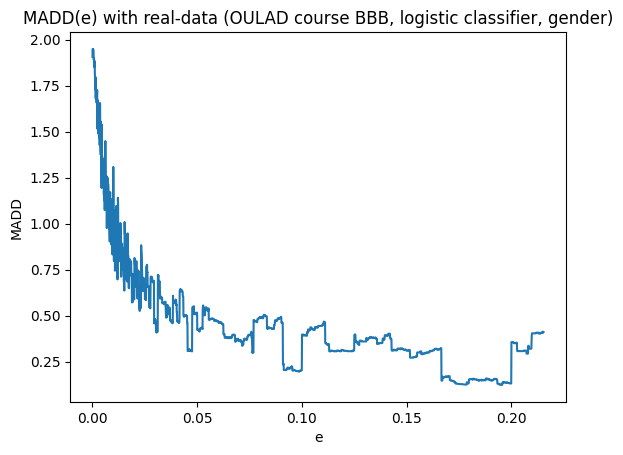

In [11]:
ind_below_order = np.where(e > order)[0][0]

plt.plot(e[:ind_below_order], madd[:ind_below_order])
if ind_below_order >= madd_min_ind:
    plt.plot(e[madd_min_ind], madd[madd_min_ind], "o", label="MADD minimum")
plt.xlabel("e")
plt.ylabel("MADD")
plt.title("MADD(e) with real-data (OULAD course BBB, logistic classifier, gender)")

## MADD(e) focus with more points in the optimal interval

In [12]:
e = np.linspace(start=0.0001, stop=order, num=10000, endpoint=False)

In [13]:
madd = [maddpkg.MADD(X_test, y_pp, "gender", ei) for ei in e]

In [14]:
madd_min_ind = np.argmin(madd)
print("MADD minimum:", madd[madd_min_ind])
print("e associated:", e[madd_min_ind])

MADD minimum: 0.1239436619718309
e associated: 0.1956039037136775


Text(0.5, 1.0, 'MADD(e) with real-data (OULAD course BBB, logistic classifier, gender)')

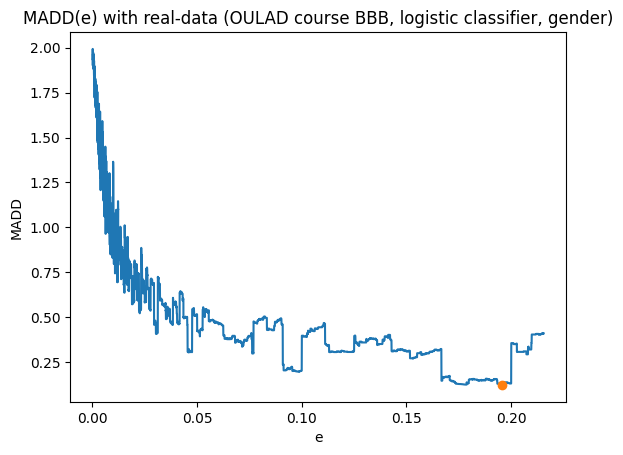

In [15]:
plt.plot(e, madd)
plt.plot(e[madd_min_ind], madd[madd_min_ind], "o", label="MADD minimum")
plt.xlabel("e")
plt.ylabel("MADD")
plt.title("MADD(e) with real-data (OULAD course BBB, logistic classifier, gender)")